In [0]:
#use of early stopping 
#stop early before the models starts overfitting

import pandas as pd
import numpy as np
import io
import requests
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.callbacks import EarlyStopping

df = pd.read_csv("https://data.heatonresearch.com/data/t81-558/iris.csv",na_values=['NA','?'])

x = df[['sepal_l','sepal_w','petal_l','petal_w']].values

dummies = pd.get_dummies(df['species'])

species = dummies.columns

y = dummies.values

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)




model = Sequential()
model.add(Dense(50,input_dim=x.shape[1],activation="relu"))
model.add(Dense(25,activation="relu"))
model.add(Dense(y.shape[1]))

model.compile(loss="mean_squared_error",optimizer="adam",metrics=["accuracy"])

monitor = EarlyStopping(monitor='val_loss',min_delta=1e-3,patience=5,verbose=1,mode='auto',restore_best_weights=True)

model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=2,epochs=1000)

#print(model.summary())
'''
pred = model.predict(x_test)
actual_classes = np.argmax(pred,axis=1)
print("the accuracy score is {}".format(np.sqrt(metrics.mean_squared_error(pred,y_test))))
'''

Train on 105 samples, validate on 45 samples
Epoch 1/1000
105/105 - 0s - loss: 0.3077 - acc: 0.4190 - val_loss: 0.2005 - val_acc: 0.6000
Epoch 2/1000
105/105 - 0s - loss: 0.2130 - acc: 0.5810 - val_loss: 0.1999 - val_acc: 0.7111
Epoch 3/1000
105/105 - 0s - loss: 0.2081 - acc: 0.6476 - val_loss: 0.1680 - val_acc: 0.7111
Epoch 4/1000
105/105 - 0s - loss: 0.1799 - acc: 0.6476 - val_loss: 0.1488 - val_acc: 0.7556
Epoch 5/1000
105/105 - 0s - loss: 0.1661 - acc: 0.5905 - val_loss: 0.1433 - val_acc: 0.7333
Epoch 6/1000
105/105 - 0s - loss: 0.1611 - acc: 0.6476 - val_loss: 0.1348 - val_acc: 0.7556
Epoch 7/1000
105/105 - 0s - loss: 0.1500 - acc: 0.7238 - val_loss: 0.1229 - val_acc: 0.8444
Epoch 8/1000
105/105 - 0s - loss: 0.1417 - acc: 0.7143 - val_loss: 0.1164 - val_acc: 0.7111
Epoch 9/1000
105/105 - 0s - loss: 0.1335 - acc: 0.6476 - val_loss: 0.1055 - val_acc: 0.8000
Epoch 10/1000
105/105 - 0s - loss: 0.1266 - acc: 0.7714 - val_loss: 0.1039 - val_acc: 0.9111
Epoch 11/1000
105/105 - 0s - loss:

'\npred = model.predict(x_test)\nactual_classes = np.argmax(pred,axis=1)\nprint("the accuracy score is {}".format(np.sqrt(metrics.mean_squared_error(pred,y_test))))\n'

In [0]:

pred = model.predict(x_test)
pred
actual_classes = np.argmax(x_test,axis=1)
pred_classes = np.argmax(pred,axis=1)

print("accuracy is {}".format(accuracy_score(actual_classes,pred_classes)))
#print("the accuracy score is {}".format(np.sqrt(metrics.mean_squared_error(pred,y_test))))

accuracy is 0.4222222222222222


In [0]:
#encoding a feature 
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


df1 = pd.read_csv("https://data.heatonresearch.com/data/t81-558/jh-simple-dataset.csv")
 
#generate dummies from job
df1 = pd.concat([df1,pd.get_dummies(df1["job"],prefix="job")],axis=1)
df1.drop("job",axis=1,inplace=True)

#generate dummies from area
df1 = pd.concat([df1,pd.get_dummies(df1["area"],prefix="area")],axis=1)
df1.drop("area",axis=1,inplace=True)

#fill null values 
df1['income'] = df1['income'].fillna(df1['income'].median())

df1 = pd.concat([df1,pd.get_dummies(df1["product"],prefix="product")],axis=1)
df1.drop("product",axis=1,inplace=True)

df1["income"] = zscore(df1["income"])
df1["aspect"] = zscore(df1["aspect"])
df1["save_rate"] = zscore(df1["save_rate"])
df1["subscriptions"] = zscore(df1["subscriptions"])
df1["dist_unhealthy"] = zscore(df1["dist_unhealthy"])
df1["dist_healthy"] = zscore(df1["dist_healthy"])

x_columns = df1.columns.drop('age').drop('id')
x = df1[x_columns].values
y = df1['age'].values

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=40)



In [0]:
model = Sequential()

model.add(Dense(25,input_dim=x.shape[1],activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam",metrics=["accuracy"])

monitor = EarlyStopping(monitor='val_loss',min_delta=1e-3,patience=5,verbose=1,mode='auto',restore_best_weights=True)

model.fit(x_train,y_train,validation_split=0.2,verbose=2,callbacks=[monitor],epochs=1000)

Train on 1200 samples, validate on 300 samples
Epoch 1/1000
1200/1200 - 0s - loss: 2012.3075 - acc: 0.0000e+00 - val_loss: 1905.2036 - val_acc: 0.0000e+00
Epoch 2/1000
1200/1200 - 0s - loss: 1821.0480 - acc: 0.0000e+00 - val_loss: 1628.7925 - val_acc: 0.0000e+00
Epoch 3/1000
1200/1200 - 0s - loss: 1436.8503 - acc: 0.0000e+00 - val_loss: 1120.2279 - val_acc: 0.0000e+00
Epoch 4/1000
1200/1200 - 0s - loss: 840.4007 - acc: 0.0000e+00 - val_loss: 482.1349 - val_acc: 0.0000e+00
Epoch 5/1000
1200/1200 - 0s - loss: 275.3762 - acc: 0.0000e+00 - val_loss: 85.5855 - val_acc: 0.0000e+00
Epoch 6/1000
1200/1200 - 0s - loss: 44.7899 - acc: 0.0000e+00 - val_loss: 20.7901 - val_acc: 0.0000e+00
Epoch 7/1000
1200/1200 - 0s - loss: 20.5258 - acc: 0.0000e+00 - val_loss: 17.9202 - val_acc: 0.0000e+00
Epoch 8/1000
1200/1200 - 0s - loss: 18.1097 - acc: 0.0000e+00 - val_loss: 16.1558 - val_acc: 0.0000e+00
Epoch 9/1000
1200/1200 - 0s - loss: 16.7419 - acc: 0.0000e+00 - val_loss: 15.2848 - val_acc: 0.0000e+00
Ep

In [0]:
from sklearn import metrics

pred = model.predict(x_test)

print("mean squared erroe is {} %".format((metrics.mean_squared_error(pred,y_test))*100))

mean squared erroe is 46.67351040829817 %


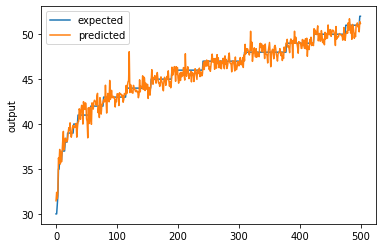

In [0]:
t = pd.DataFrame({"pred":pred.flatten(),"y_test":y_test.flatten()})

t.sort_values(by=["y_test"],inplace=True)

plt.plot(t["y_test"].to_list(),label="expected")
plt.plot(t["pred"].to_list(),label="predicted")
plt.ylabel("output")
plt.legend()
plt.show()

In [0]:
#kfold cross validation on regression

from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
import pandas as pd
import numpy as np
import os
from scipy.stats import zscore

kf = KFold(5,shuffle=True,random_state=32)

oos_y = []
oos_pred = []

fold=0

for train,test in kf.split(x):
  fold+=1
  print("fold {}".format(fold))

  x_tr = x[train]
  x_te = x[test]
  y_tr = y[train]
  y_te = y[test]

  model = Sequential()
  model.add(Dense(20,input_dim=x.shape[1],activation="relu"))
  model.add(Dense(10,activation="relu"))
  model.add(Dense(1))
  model.compile(loss="mean_squared_error",optimizer="adam",metrics=["accuracy"])

  model.fit(x_tr,y_tr,validation_data=(x_te,y_te),verbose=0,epochs=500)

  pred = model.predict(x_te)

  oos_y.append(y_te)
  oos_pred.append(pred)

  score = np.sqrt(metrics.mean_squared_error(pred,y_te))

  print(f"Fold score (RMSE) : {score}")

oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)

score = np.sqrt(metrics.mean_squared_error(oos_pred,oos_y))

print(f"Fold score (RMSE) : {score}")





fold 1
Fold score (RMSE) : 0.5551785481088016
fold 2
Fold score (RMSE) : 0.6743100021589337
fold 3
Fold score (RMSE) : 1.0046346015058527
fold 4
Fold score (RMSE) : 0.6323183064983567
fold 5
Fold score (RMSE) : 0.5986137867194541
Fold score (RMSE) : 0.711389174533624
